In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/processed/WESAD/data_processed/300s/all_data.csv', index_col=0)
df.head(5)

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.748133,-22.255867,-4.326867,63.086300,5.433028,0.678001,0.157140,-0.000355,22.074528,1.507680,83.076230,780.843099,218.245291,201.013381,75.456919,1.434083,1,8,1
1,50.712267,-17.661667,9.794267,62.956605,2.643999,0.385848,0.046986,-0.000134,20.638919,1.441847,74.868636,834.218315,169.364924,147.037346,52.513966,1.976706,1,8,1
2,39.177867,-39.364933,-11.534133,62.924572,3.104073,0.293648,0.012340,-0.000030,18.301004,2.152321,80.733326,789.248021,217.533109,176.135461,65.079365,2.338649,1,8,1
3,30.984733,1.087267,45.499400,63.192598,4.728301,0.258352,0.011100,-0.000026,18.695615,1.839474,80.433240,784.827303,223.633876,158.586724,72.031662,3.799229,1,8,1
4,38.478267,6.671867,36.179067,63.375288,4.509987,0.246007,0.027276,0.000045,20.605565,1.404856,89.423194,732.613358,269.099217,208.165930,79.115479,1.937012,1,8,1


In [3]:
features = ['HR', 'EDA_mean', 'RMSSD', 'RESP_rate', 'net_acc_mean']

In [4]:
mask = pd.Series(True, index=df.index)

In [5]:
for subject in df['subject'].unique():
    for label in df['label'].unique():
        sub_df = df[(df['subject'] == subject) & (df['label'] == label)]
        for feature in features:
            q1 = sub_df[feature].quantile(0.25)
            q3 = sub_df[feature].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outlier_mask = (df['subject'] == subject) & (df['label'] == label) & (
                            (df[feature] < lower) | (df[feature] > upper))
            mask[outlier_mask] = False

df = df[mask].reset_index(drop=True)

In [6]:
df.to_csv('../../data/processed/WESAD/data_processed/240s/eda_data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACC_x_mean       125 non-null    float64
 1   ACC_y_mean       125 non-null    float64
 2   ACC_z_mean       125 non-null    float64
 3   net_acc_mean     125 non-null    float64
 4   net_acc_std      125 non-null    float64
 5   EDA_mean         125 non-null    float64
 6   EDA_std          125 non-null    float64
 7   EDA_slope        125 non-null    float64
 8   RESP_rate        125 non-null    float64
 9   RESP_regularity  125 non-null    float64
 10  HR               125 non-null    float64
 11  IBI              125 non-null    float64
 12  RMSSD            125 non-null    float64
 13  SDNN             125 non-null    float64
 14  pNN50            125 non-null    float64
 15  lf/hf            125 non-null    float64
 16  label            125 non-null    int64  
 17  subject         

In [8]:
df.value_counts('focus_label')

focus_label
0    69
1    56
Name: count, dtype: int64

## Univariate analysis

In [9]:
features = ['HR', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'EDA_mean', 'RESP_rate', 'net_acc_mean']

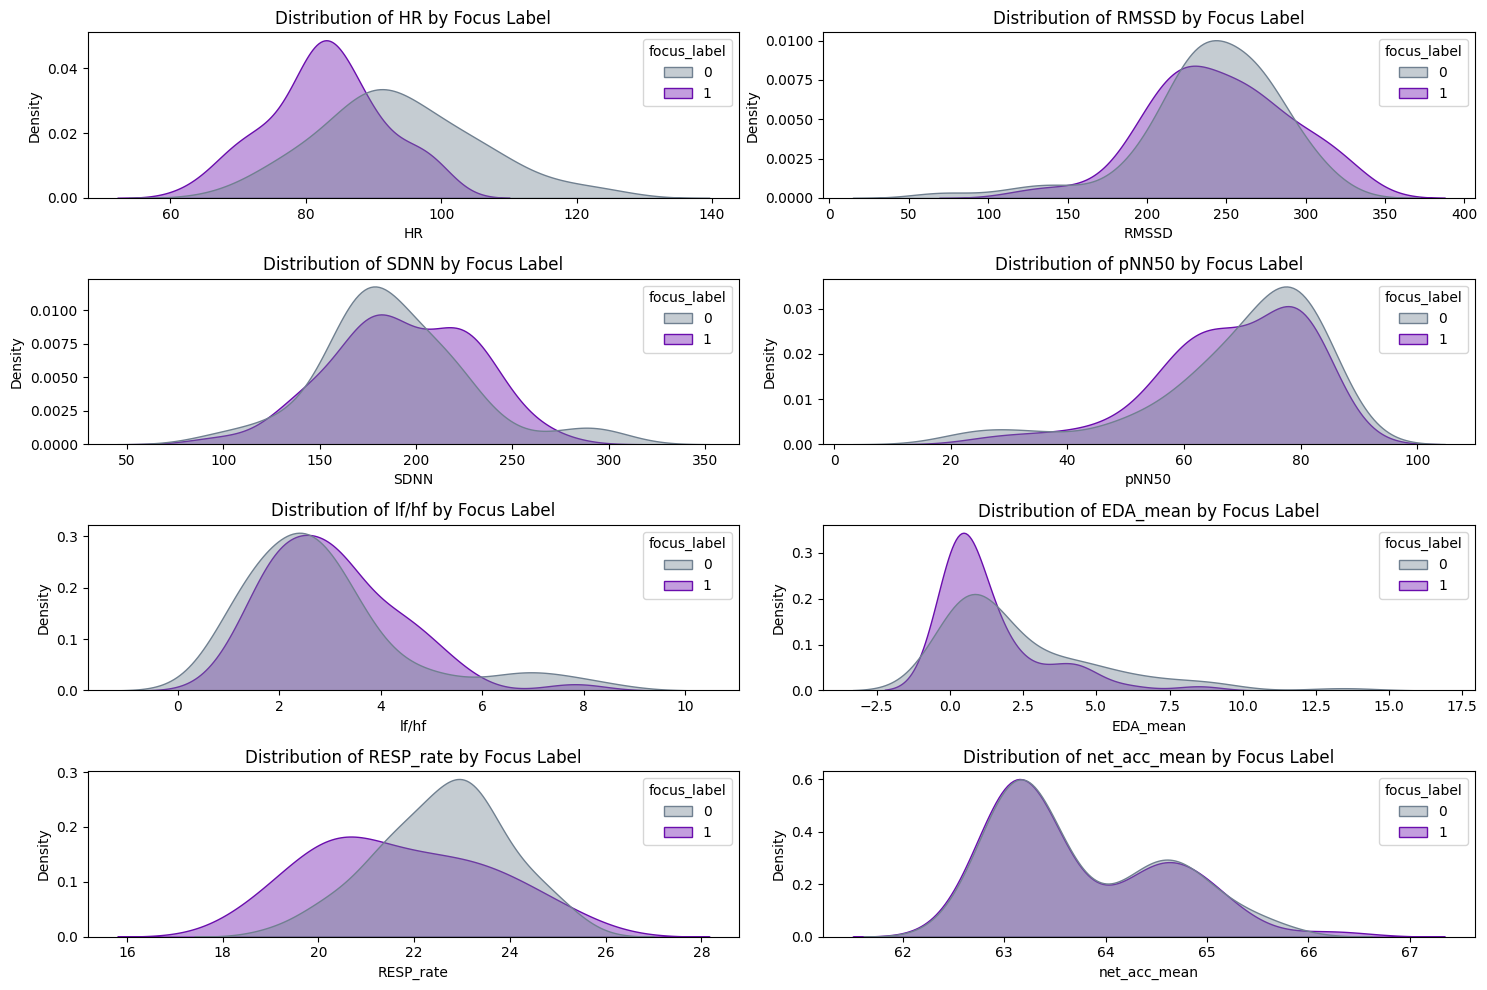

In [10]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=df, x=feature, hue='focus_label', common_norm=False,
                palette={0: "#708090", 1: "#6A0DAD"}, fill=True, alpha=0.4)
    plt.title(f'Distribution of {feature} by Focus Label')
plt.tight_layout()
plt.show()

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std', 'focus_label', 'label', 'subject'])
corr = numeric_cols.corr()

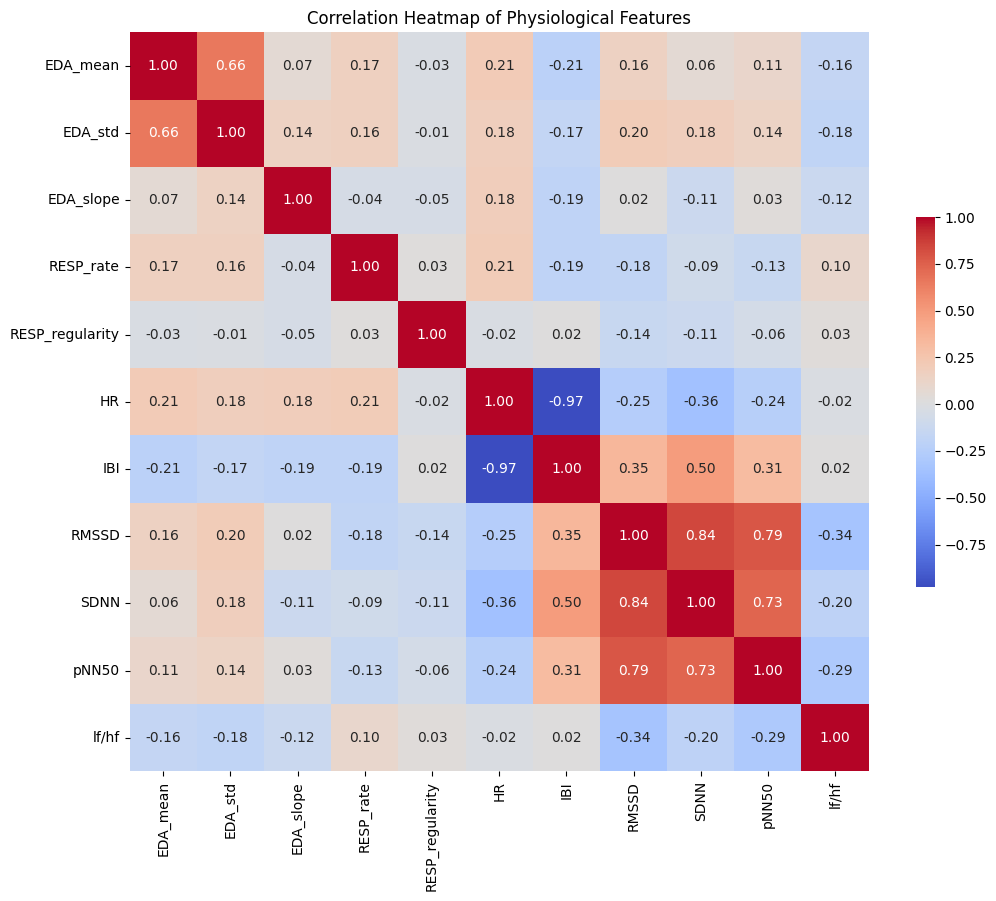

In [12]:
plt.figure(figsize=(11, 9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.5})
plt.title("Correlation Heatmap of Physiological Features")
plt.tight_layout()
plt.show()

In [13]:
selected_features = ['EDA_mean', 'HR', 'RMSSD', 'RESP_rate', 'lf/hf']

In [14]:
df["focus_state"] = df["focus_label"].map({0: "Not Focus", 1: "Focus"})

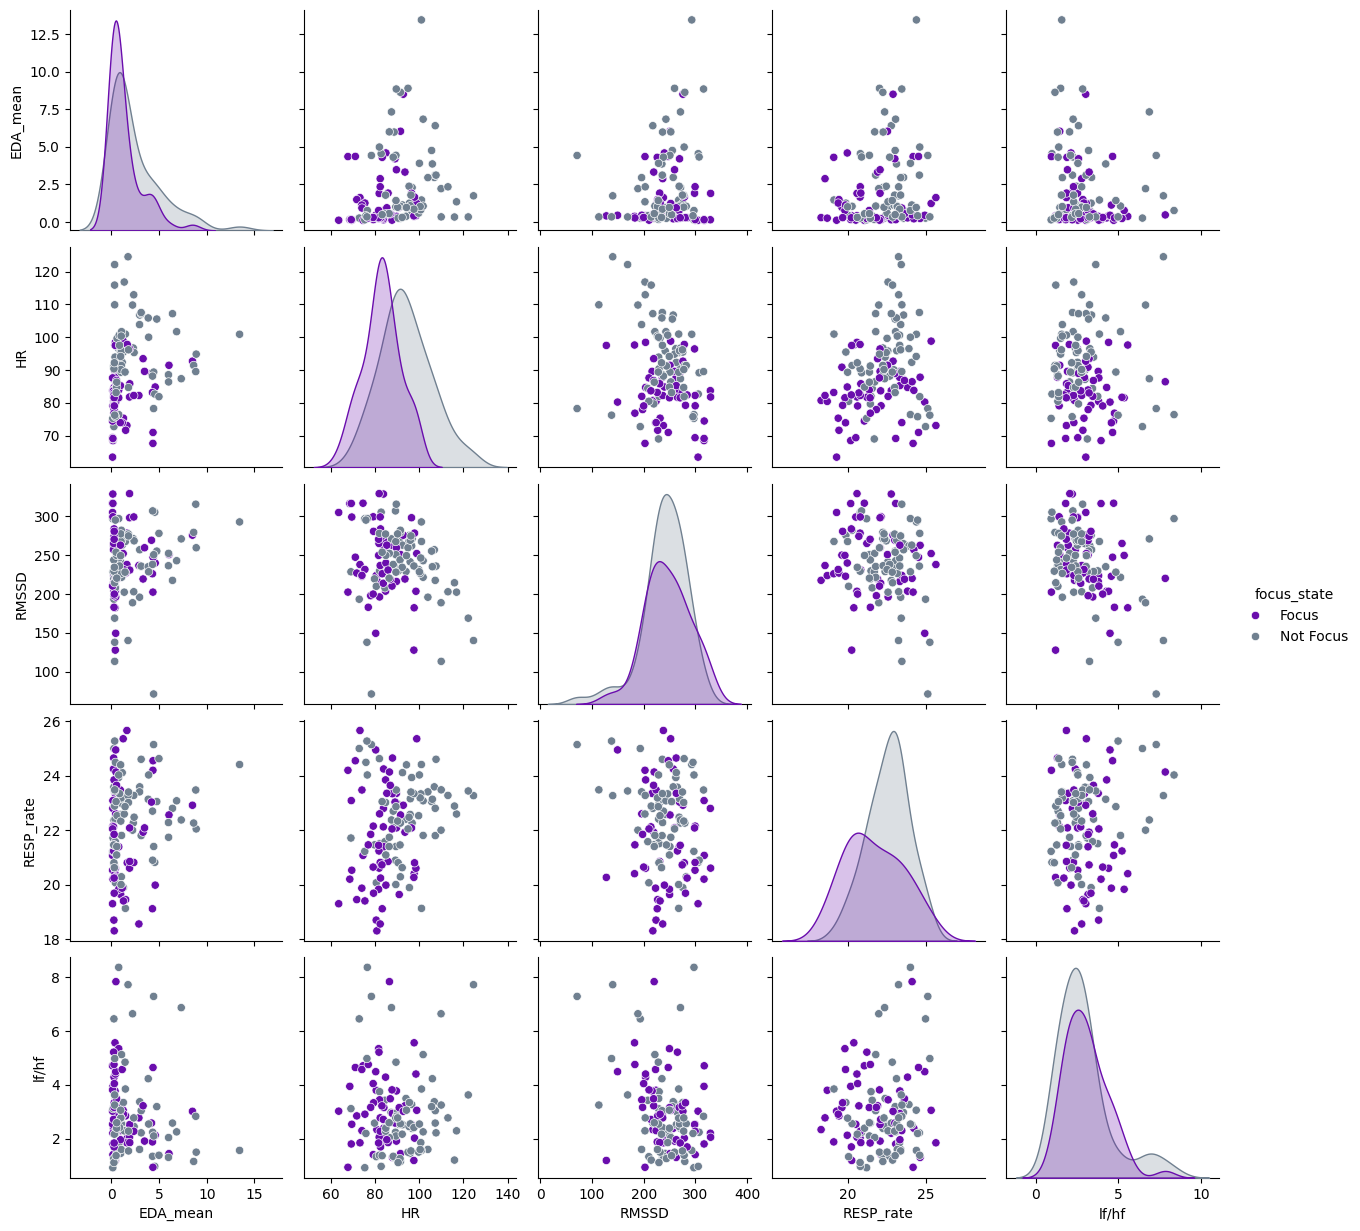

In [15]:
sns.pairplot(df[selected_features + ["focus_state"]], hue="focus_state", diag_kind="kde", 
             palette={"Not Focus": "#708090", "Focus": "#6A0DAD"})
plt.show()